<a href="https://colab.research.google.com/github/nickolandermilan30/Coffeetech_model_algorithm/blob/main/CoffeeTech_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.layers import Dense

In [ ]:

img_height, img_width = 32, 32
batch_size = 20

test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Dataset_CoffeeTech",
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 33755 files belonging to 16 classes.


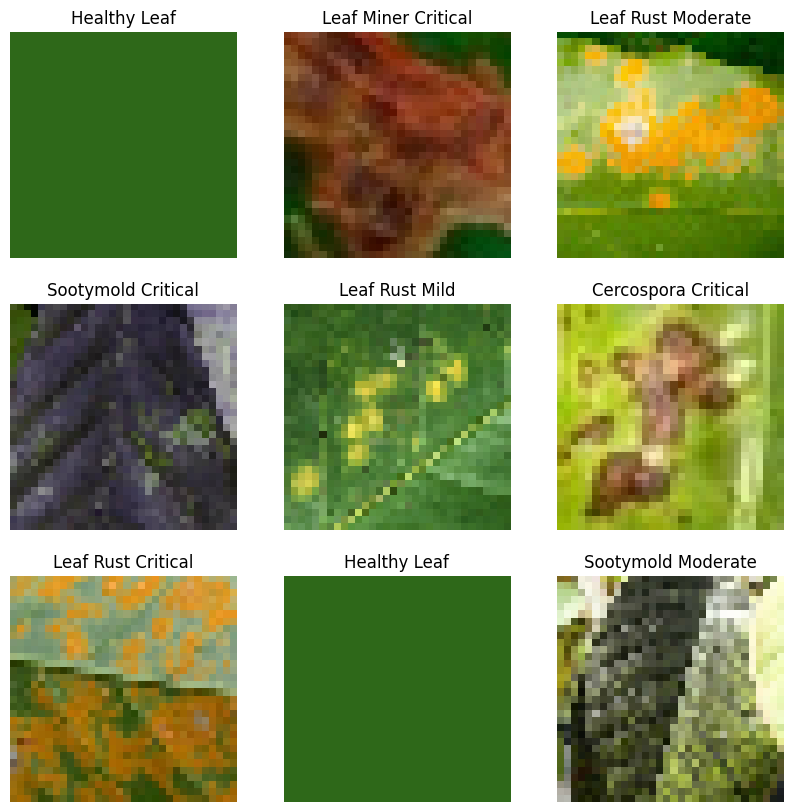

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

class_names = [
      "Cercospora Critical",
      "Cercospora Moderate",
      "Cercospora Mild",
      "Healthy Leaf",
      "Leaf Miner Critical",
      "Leaf Miner Mild",
      "Leaf Miner Moderate",
      "Leaf Rust Critical",
      "Leaf Rust Mild",
      "Leaf Rust Moderate",
      "Phoma Critical",
      "Phoma Mild",
      "Phoma Moderate",
      "Sootymold Critical",
      "Sootymold Mild",
      "Sootymold Moderate",

]
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(16)  # Update the number of units to match your dataset
    ]
)



In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
# Now, you can fit the model
model.fit(test_ds, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 2697s 2s/step - loss: 0.0891 - accuracy: 0.9754
Epoch 2/10
1688/1688 [==============================] - 136s 80ms/step - loss: 9.4136e-06 - accuracy: 1.0000
Epoch 3/10
1688/1688 [==============================] - 130s 77ms/step - loss: 2.0957e-06 - accuracy: 1.0000
Epoch 4/10
1688/1688 [==============================] - 133s 79ms/step - loss: 6.7428e-07 - accuracy: 1.0000
Epoch 5/10
1688/1688 [==============================] - 133s 79ms/step - loss: 2.3716e-07 - accuracy: 1.0000
Epoch 6/10
1688/1688 [==============================] - 131s 77ms/step - loss: 8.3791e-08 - accuracy: 1.0000
Epoch 7/10
1688/1688 [==============================] - 134s 79ms/step - loss: 3.1936e-08 - accuracy: 1.0000
Epoch 8/10
1688/1688 [==============================] - 132s 78ms/step - loss: 0.0685 - accuracy: 0.9945
Epoch 9/10
1688/1688 [==============================] - 132s 78ms/step - loss: 9.8800e-05 - accuracy: 1.0000
Epoch 10/10
1688/1688 [=====

In [ ]:
# Listahan ng mga dataset para sa pagsasanay at pagsusuri
datasets = [test_ds]

# Inisyalisasyon ng kabuuang accuracy
total_accuracy = 0.0

# Pag-iterate sa bawat dataset
for dataset in datasets:
    # I-valuate ang modelo sa dataset
    evaluation_result = model.evaluate(dataset)

    # Kunin ang accuracy mula sa huling index ng list
    accuracy = evaluation_result[-1]

    # I-add ang accuracy sa kabuuang accuracy
    total_accuracy += accuracy

# Kunin ang average ng accuracy
overall_accuracy = (total_accuracy / len(datasets)) * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")


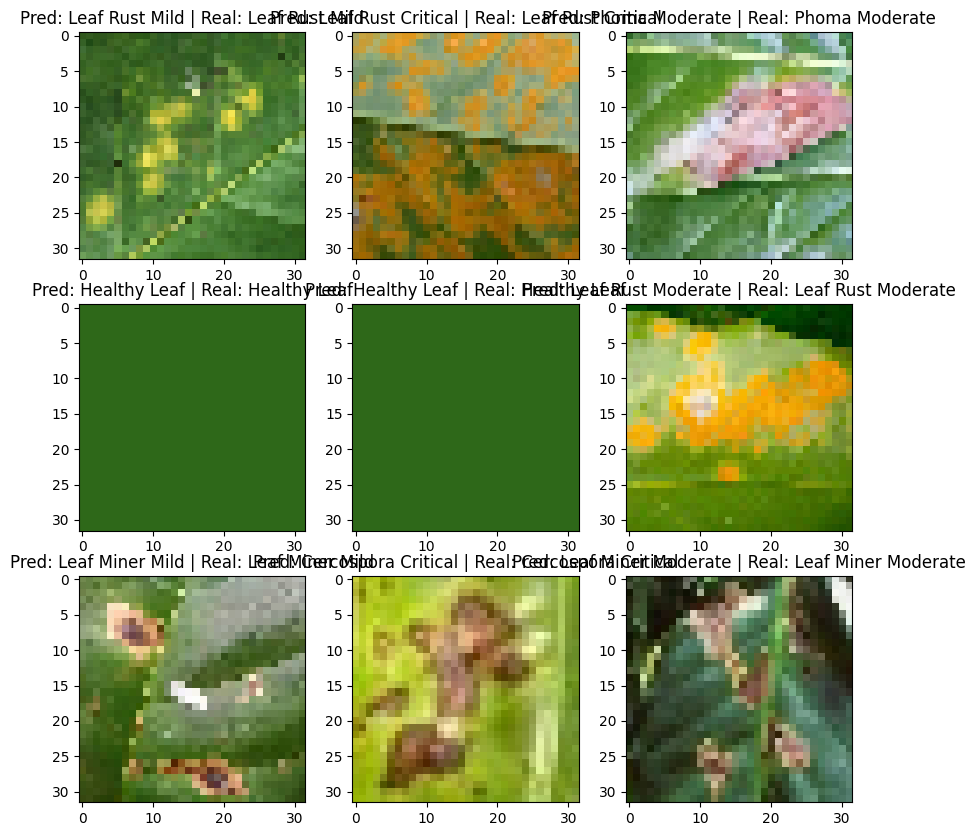

In [ ]:

import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("Dataset5.tflite", 'wb') as f:
  f.write(tflite_model)